In [1]:
import pandas as pd 
import seaborn as sns 

In [3]:
df = pd.read_csv("M:/Downloads/Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [8]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75) 
df['Chance of Admit'] = bi.fit_transform(df[['Chance of Admit']])
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [9]:
x = df.drop('Chance of Admit', axis =1) 
y = df['Chance of Admit'] 

In [10]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [11]:
y= y.astype('int')

In [12]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit, Length: 500, dtype: int32

<Axes: xlabel='Chance of Admit', ylabel='count'>

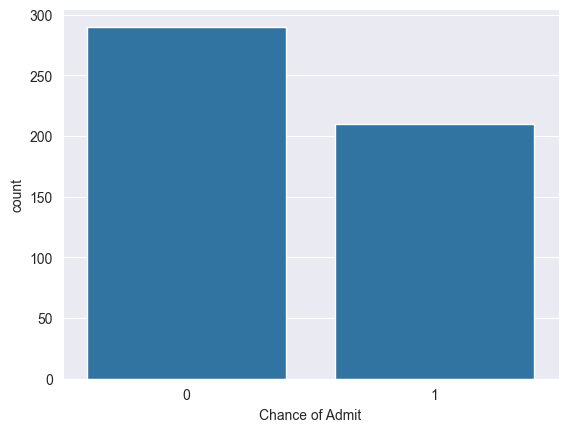

In [13]:
sns.countplot(x=y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [19]:
x_train.shape

(400, 8)

In [20]:
x_test.shape

(100, 8)

In [21]:
y_train.shape

(400,)

In [22]:
y_test.shape

(100,)

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
result = pd.DataFrame({'actual' : y_test,'predicted':y_pred})

In [27]:
result.head()

,actual,predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0


In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [29]:

from sklearn.metrics import classification_report
accuracy_score(y_test,y_pred)

0.95

In [30]:

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred,labels = classifier.classes_)

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

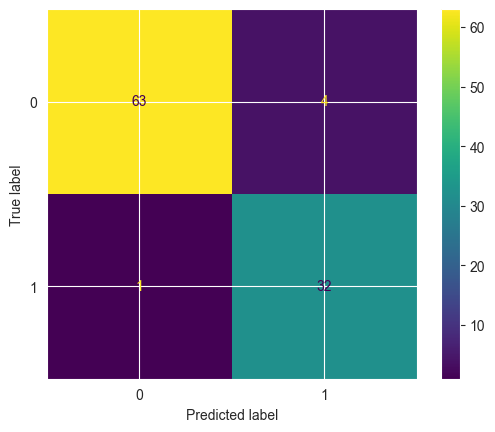

In [32]:
disp.plot()

In [33]:
accuracy_score(y_test, y_pred)

0.95

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.89      0.97      0.93        33

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100



In [35]:
new = [[140,300,110,5,4.5,4.5,9.2,1]]

In [38]:
classifier.predict(new)[0]

C:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

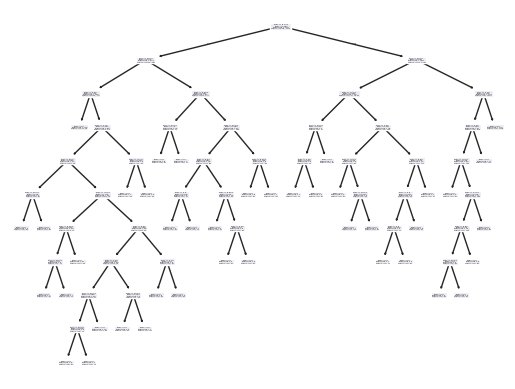

In [39]:
from sklearn.tree import plot_tree 
plot_tree(classifier, );

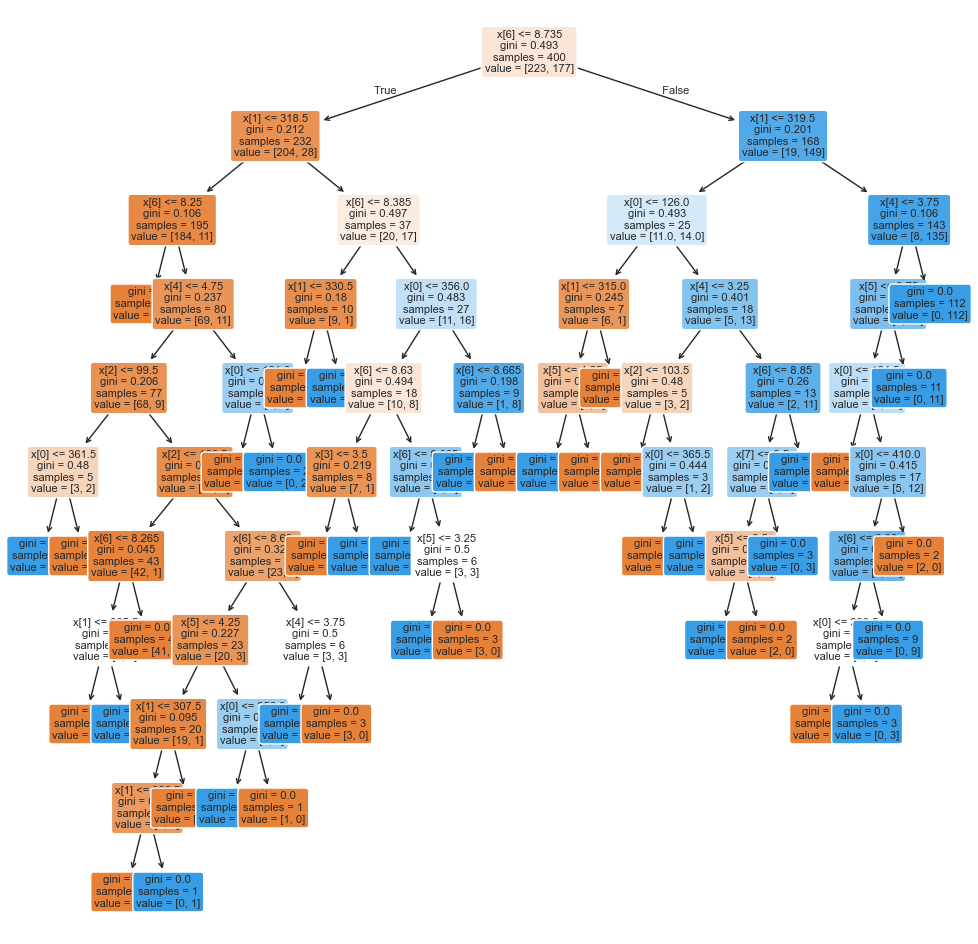

In [40]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12)) 
plot_tree(classifier, fontsize=8, filled=True, rounded = True);

[Text(0.5462570621468926, 0.9545454545454546, 'CGPA <= 8.735\ngini = 0.493\nsamples = 400\nvalue = [223, 177]'),
 Text(0.2733050847457627, 0.8636363636363636, 'GRE Score <= 318.5\ngini = 0.212\nsamples = 232\nvalue = [204, 28]'),
 Text(0.40978107344632764, 0.9090909090909092, 'True  '),
 Text(0.16242937853107345, 0.7727272727272727, 'CGPA <= 8.25\ngini = 0.106\nsamples = 195\nvalue = [184, 11]'),
 Text(0.13983050847457626, 0.6818181818181818, 'gini = 0.0\nsamples = 115\nvalue = [115, 0]'),
 Text(0.1850282485875706, 0.6818181818181818, 'SOP <= 4.75\ngini = 0.237\nsamples = 80\nvalue = [69, 11]'),
 Text(0.11581920903954802, 0.5909090909090909, 'TOEFL Score <= 99.5\ngini = 0.206\nsamples = 77\nvalue = [68, 9]'),
 Text(0.04519774011299435, 0.5, 'Serial No. <= 361.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.022598870056497175, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06779661016949153, 0.4090909090909091, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),


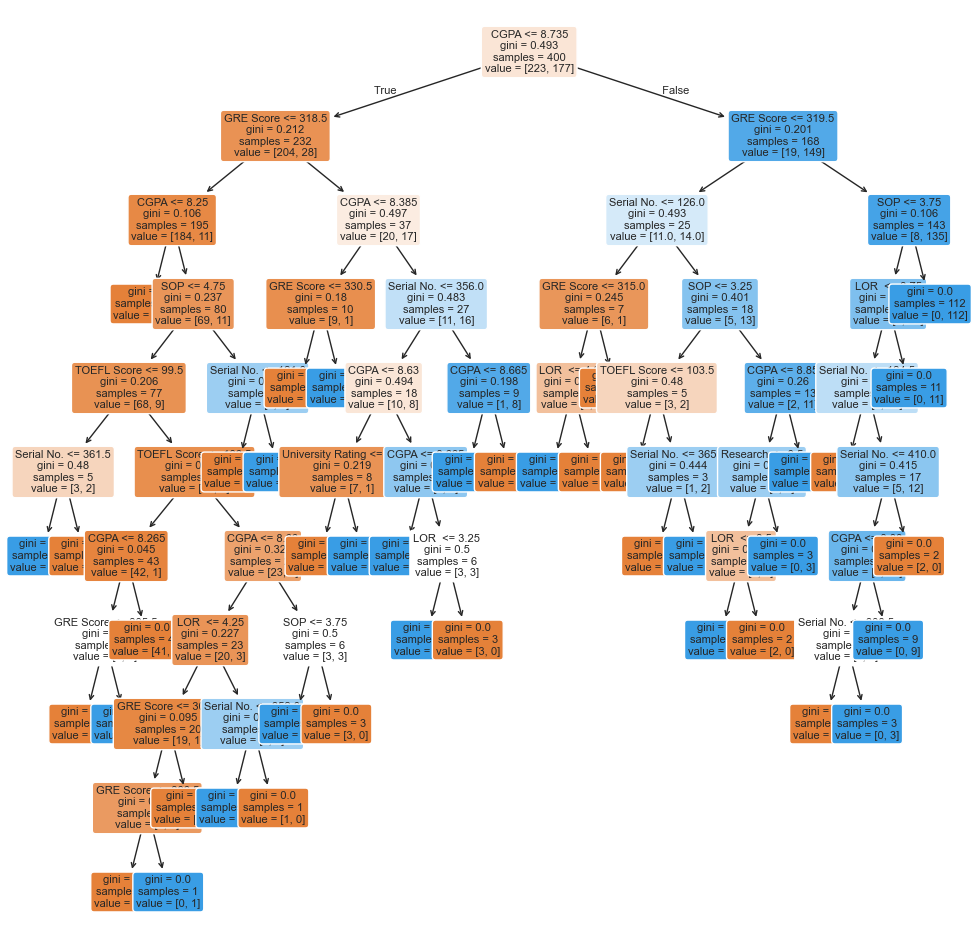

In [44]:
plt.figure(figsize=(12,12)) 
plot_tree(classifier, fontsize=8, filled=True, rounded = True, feature_names=x.columns)